# RETAIL STORE INVENTORY FORECASTING 


# INTRODUCTION
This dataset provides synthetic yet realistic data for analyzing and forecasting retail store inventory demand. It contains over 73000 rows of daily data across multiple stores and products, including attributes like sales, inventory levels, pricing, weather, promotions, and holidays.

The dataset is ideal for practicing machine learning tasks such as demand forecasting, dynamic pricing, and inventory optimization. It allows data scientists to explore time series forecasting techniques, study the impact of external factors like weather and holidays on sales, and build advanced models to optimize supply chain performance.

### IMPORTING NECESSARRY LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### LOADING DATASET

In [2]:
df = pd.read_csv(r"D:\DATASCIENCE\Projects\retail_store_inventory.csv")
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,01-01-2022,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,01-01-2022,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,01-01-2022,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,01-01-2022,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,01-01-2022,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,01-01-2024,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,01-01-2024,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,01-01-2024,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,01-01-2024,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


### Displaying the First 5 Rows of the Dataset

In [3]:
#SHOWS THE TOP 5 ROWS OF THE DATASET.
df.head(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,01-01-2022,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,01-01-2022,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,01-01-2022,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,01-01-2022,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,01-01-2022,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


### Displaying the Last 5 Rows of the Dataset

In [4]:
#SHOWS THE BOTTOM 5 ROWS OF THE DATASET
df.tail(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,01-01-2024,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,01-01-2024,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,01-01-2024,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,01-01-2024,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,01-01-2024,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


##  DATA CLEANING AND UNDERSTANDING

Data cleaning ensured the dataset was consistent and analysis-ready, with correct data types and no missing or invalid values affecting the results. This step helped maintain data reliability and allowed accurate interpretation in subsequent exploratory analysis.

### Shape of the Dataset

In [5]:
#RETURNS THE SIZE OF THE DATASET IN TERMS OF ROWS AND COLUMNS.
print("Shape of the dataset (rows, columns):", df.shape)

Shape of the dataset (rows, columns): (73100, 15)


### Non-Missing Value Count

In [6]:
# TO SHOW HOW MANY NON-MISSING (NON-NULL) VALUES ARE PRESENT IN EACH COLUMN OF YOUR DATASET
print(df.count())

Date                  73100
Store ID              73100
Product ID            73100
Category              73100
Region                73100
Inventory Level       73100
Units Sold            73100
Units Ordered         73100
Demand Forecast       73100
Price                 73100
Discount              73100
Weather Condition     73100
Holiday/Promotion     73100
Competitor Pricing    73100
Seasonality           73100
dtype: int64


### Display Column Names

In [7]:
#SHOWS ALL THE COLUMN NAMES
print(df.columns)

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')


### Checking the Data Types

In [8]:
# SHOWS THE DATA TYPES OF EACH COLUMN
print(df.dtypes)

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object


### Change the 'Date' Column into Date Format

In [9]:
#CONVERTS THE DATE COLUMN INTO AN ACTUAL DATETIME TYPE.
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
print(df.dtypes)

Date                  datetime64[ns]
Store ID                      object
Product ID                    object
Category                      object
Region                        object
Inventory Level                int64
Units Sold                     int64
Units Ordered                  int64
Demand Forecast              float64
Price                        float64
Discount                       int64
Weather Condition             object
Holiday/Promotion              int64
Competitor Pricing           float64
Seasonality                   object
dtype: object


### Information About the Data

In [10]:
#TO GET THE INFORMATION ABOUT THE DATA
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

### Duplicates

In [11]:
#IT COUNTS THE DUPLICATE ROWS AND THEN SHOWS THOSE DUPLICATE ROWS.

duplicates = df.duplicated().sum()
print("Number of duplicate records:", duplicates)


duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Number of duplicate records: 0
Empty DataFrame
Columns: [Date, Store ID, Product ID, Category, Region, Inventory Level, Units Sold, Units Ordered, Demand Forecast, Price, Discount, Weather Condition, Holiday/Promotion, Competitor Pricing, Seasonality]
Index: []


### Checking the Total Number of Missing Values

In [12]:
#SHOWS MISSING VALUES IN EACH COLUMN & SHOWS TOTAL NUMBER OF MISSING VALUES
print(df.isna().sum())
print('\n')
print("Total number of missing values :",df.isna().sum().sum())

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


Total number of missing values : 0


### Shape of the Dataset 

In [13]:
df_cleaned = df.dropna()

print("Original shape:", df.shape)
print("New shape after removing nulls:", df_cleaned.shape)

Original shape: (73100, 15)
New shape after removing nulls: (73100, 15)


### Summary Statistics of Numeric Columns (Mean, Median, etc.)

In [14]:
#SUMMARY STATISTICS (MEAN, STD, MIN, MAX, ETC.) FOR ALL NUMERIC COLUMNS IN THE DATASET.
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
       Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min       10.000000      0.0000

### Unique Values in Each Column

In [15]:
print("UNIQUE VALUES - STORE ID")
print(df['Store ID'].unique())

print("UNIQUE VALUES - PRODUCT ID")
print(df['Product ID'].unique())

print("UNIQUE VALUES - CATEGORY")
print(df['Category'].unique())

print("UNIQUE VALUES - REGION")
print(df['Region'].unique())

print("UNIQUE VALUES - SEASONALITY")
print(df['Seasonality'].unique())


UNIQUE VALUES - STORE ID
['S001' 'S002' 'S003' 'S004' 'S005']
UNIQUE VALUES - PRODUCT ID
['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010' 'P0011' 'P0012' 'P0013' 'P0014' 'P0015' 'P0016' 'P0017' 'P0018'
 'P0019' 'P0020']
UNIQUE VALUES - CATEGORY
['Groceries' 'Toys' 'Electronics' 'Furniture' 'Clothing']
UNIQUE VALUES - REGION
['North' 'South' 'West' 'East']
UNIQUE VALUES - SEASONALITY
['Autumn' 'Summer' 'Winter' 'Spring']


# FEATURE ENGINEERING 

Feature Engineering is an important step because it helps convert raw data into meaningful information that a model can easily understand. By creating new features from existing data, such as combining related values or transforming data into a simpler form, important patterns in the dataset become clearer. This process improves data quality, reduces unnecessary noise, and helps the machine learning model produce more accurate and reliable results.


### Revenue 

In [16]:
df['Revenue'] = df['Units Sold'] * df['Price']

 ###   Discounted Price

In [17]:
df["Discounted_Price"] = df["Price"] - (df["Price"] * df["Discount"] / 100)

### Value Per Sale

In [18]:
df["Value_Per_Sale"] = df["Revenue"] / (df["Units Sold"] + 1)

###  Seasonal Features

In [19]:
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Quarter"] = df["Date"].dt.quarter

###  Profit After Discount

In [20]:
df["Profit_After_Discount"] = df["Revenue"] - (df["Discounted_Price"] * df["Units Sold"])

###  Demand–Supply Gap 

In [21]:
df["Demand_Supply_Gap"] = df["Units Sold"] - df["Inventory Level"]

###  Age of Product (Days Since Record Date)

In [22]:
df["Age_of_Record"] = (pd.Timestamp.today() - df["Date"]).dt.days

####  Stock Status (Low, Medium, High)

In [23]:
def stock_status(qty):
    if qty < 20:
        return "Low"
    elif qty <= 60:
        return "Medium"
    else:
        return "High"

df["Stock_Status"] = df["Inventory Level"].apply(stock_status)


In [24]:
print("\nFeature Engineering Completed")
print(df.head())


Feature Engineering Completed
        Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  ...  Discounted_Price  \
0         127             55           135.47  33.50  ...            26.800   
1         150             66           144.04  63.01  ...            50.408   
2          65             51            74.02  27.99  ...            25.191   
3          61            164            62.18  32.72  ...            29.448   
4          14            135             9.26  73.64  ...            73.640   

  Value_Per_Sale  Day  Month  Year  Quarter  Profit_Aft

## RELATIONSHIP AND TREND ANALYSIS

Relationship and trend analysis was used to study how variables like price, discount, inventory level, and units sold are connected. It helps identify sales patterns over time, seasonal effects, and factors that influence demand. This analysis supports better inventory planning and decision-making.

### Which products have revenue greater than 10,000?

In [25]:
high_revenue = df[df['Revenue'] > 10000]
high_revenue[['Product ID', 'Revenue']].head()


,Product ID,Revenue
7,P0008,30572.88
14,P0015,34313.31
18,P0019,18832.96
24,P0005,12993.24
25,P0006,21397.50


### List all items sold during holiday/promotion periods.

In [26]:
holiday_items = df[df['Holiday/Promotion'] == 1]
holiday_items.head()


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Discounted_Price,Value_Per_Sale,Day,Month,Year,Quarter,Profit_After_Discount,Demand_Supply_Gap,Age_of_Record,Stock_Status
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,...,25.191,27.565909,1,1,2022,1,181.935,-37,1442,High
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,...,29.448,32.192258,1,1,2022,1,199.592,-408,1442,High
5,2022-01-01,S001,P0006,Groceries,South,138,128,102,139.82,76.83,...,69.147,76.234419,1,1,2022,1,983.424,-10,1442,High
6,2022-01-01,S001,P0007,Furniture,East,359,97,167,108.92,34.16,...,30.744,33.811429,1,1,2022,1,331.352,-262,1442,High
9,2022-01-01,S001,P0010,Toys,South,108,28,196,24.47,59.99,...,59.990,57.921379,1,1,2022,1,0.000,-80,1442,High


### Find products with low stock (Units Sold < 50).

In [27]:
low_stock = df[df['Units Sold'] < 50]
low_stock[['Product ID', 'Units Sold']].head()


,Product ID,Units Sold
4,P0005,14
9,P0010,28
11,P0012,24
12,P0013,42
13,P0014,12


### Which regions sold more than 5000 units in total? 

In [28]:
region_sales = df.groupby('Region')['Units Sold'].sum()
region_sales[region_sales > 5000]


Region
East     2511265
North    2484966
South    2507799
West     2471552
Name: Units Sold, dtype: int64

### Filter the data for Seasonality = 'Winter' AND Revenue > 8,000

In [29]:
winter_high_sales = df[(df['Seasonality'] == 'Winter') & (df['Revenue'] > 8000)]
winter_high_sales.head()


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Discounted_Price,Value_Per_Sale,Day,Month,Year,Quarter,Profit_After_Discount,Demand_Supply_Gap,Age_of_Record,Stock_Status
5,2022-01-01,S001,P0006,Groceries,South,138,128,102,139.82,76.83,...,69.1470,76.234419,1,1,2022,1,983.4240,-10,1442,High
14,2022-01-01,S001,P0015,Clothing,North,379,369,154,363.46,92.99,...,79.0415,92.738676,1,1,2022,1,5146.9965,-10,1442,High
18,2022-01-01,S001,P0019,Clothing,East,352,257,186,267.38,73.28,...,65.9520,72.995969,1,1,2022,1,1883.2960,-95,1442,High
25,2022-01-01,S002,P0006,Furniture,North,492,250,168,242.57,85.59,...,68.4720,85.249004,1,1,2022,1,4279.5000,-242,1442,High
44,2022-01-01,S003,P0005,Clothing,West,438,325,20,330.92,97.95,...,78.3600,97.649540,1,1,2022,1,6366.7500,-113,1442,High


### What is the mean, median, and standard deviation of Revenue?

In [30]:
mean_rev = df['Revenue'].mean()
median_rev = df['Revenue'].median()
std_rev = df['Revenue'].std()

print('Mean=',mean_rev)
print('Median=',median_rev)
print('Standard Deviation=',std_rev)


Mean= 7527.070929001367
Median= 4956.09
Standard Deviation= 7537.500440577813


###  Which category has the highest average sales (Units Sold)?

In [31]:
df.groupby('Category')['Units Sold'].mean().sort_values(ascending=False)


Category
Furniture      137.765630
Groceries      136.916159
Clothing       136.685765
Toys           135.934235
Electronics    135.006680
Name: Units Sold, dtype: float64

###  Which store has the highest total sales?

In [32]:
df.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head()


Store ID
S003    2022696
S005    2010176
S002    1987715
S004    1979245
S001    1975750
Name: Units Sold, dtype: int64

###  What are the monthly sales trends?

In [33]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.to_period('M')

df.groupby('Month')['Units Sold'].sum().head(10)


Month
2022-01    419938
2022-02    391052
2022-03    426073
2022-04    407380
2022-05    414799
2022-06    415509
2022-07    426628
2022-08    424916
2022-09    411610
2022-10    426863
Freq: M, Name: Units Sold, dtype: int64

###  Do holidays/promotions increase sales?

In [34]:
holiday_sales = df[df['Holiday/Promotion'] == 1]['Units Sold'].mean()
normal_sales  = df[df['Holiday/Promotion'] == 0]['Units Sold'].mean()

print('HoliDay Sales=',holiday_sales)
print('Normal Sales=',normal_sales)


HoliDay Sales= 136.4239264985008
Normal Sales= 136.50537458840176


###  Which region has the highest total demand? 

In [35]:
df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)


Region
East     2511265
South    2507799
North    2484966
West     2471552
Name: Units Sold, dtype: int64

### What is the average discount for each product category?

In [36]:
avg_discount_category = df.groupby('Category')['Discount'].mean()
print(avg_discount_category)

Category
Clothing       10.005812
Electronics    10.040975
Furniture      10.031635
Groceries       9.975361
Toys            9.993854
Name: Discount, dtype: float64


###  What is the total number of units sold for each year?

In [37]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
yearly_sales = df.groupby('Year')['Units Sold'].sum()

yearly_sales.head()


Year
2022    4991624
2023    4970714
2024      13244
Name: Units Sold, dtype: int64

###  How many holidays or promotions occur in each season?

In [38]:
season_holiday = df.groupby('Seasonality')['Holiday/Promotion'].sum()
print(season_holiday)


Seasonality
Autumn    9028
Spring    9168
Summer    9088
Winter    9069
Name: Holiday/Promotion, dtype: int64


###  How does the number of products sold vary across different weather conditions? 

In [39]:
weather_product = df.groupby('Weather Condition')['Product ID'].count()
print(weather_product)


Weather Condition
Cloudy    18260
Rainy     18278
Snowy     18272
Sunny     18290
Name: Product ID, dtype: int64


###  How does product sales vary across different categories?

In [40]:
sales_per_category = df.groupby('Category')['Units Sold'].sum()
print(sales_per_category)



Category
Clothing       1999166
Electronics    1960432
Furniture      2025017
Groceries      2000482
Toys           1990485
Name: Units Sold, dtype: int64


### Which season has the highest average revenue?

In [41]:
season_avg = df.groupby('Seasonality')['Revenue'].mean()
season_avg


Seasonality
Autumn    7588.589793
Spring    7485.522206
Summer    7472.699997
Winter    7561.913433
Name: Revenue, dtype: float64

### Find the correlation between Units Sold and Revenue.

In [42]:
df[['Units Sold', 'Revenue']].corr()


,Units Sold,Revenue
Units Sold,1.000000,0.798285
Revenue,0.798285,1.000000


### What is the average revenue of products that were sold during holidays?

In [43]:
avg_holiday_rev = df[df['Holiday/Promotion'] == 1]['Revenue'].mean()
avg_holiday_rev


7530.50982697439

### Compare average units sold: Holiday vs Non-Holiday.

In [44]:
df.groupby('Holiday/Promotion')['Units Sold'].mean()


Holiday/Promotion
0    136.505375
1    136.423926
Name: Units Sold, dtype: float64

### Find products that are Electronics AND sold in the South

In [45]:
df[(df['Category'] == 'Electronics') & (df['Region'] == 'South')]


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Discounted_Price,Value_Per_Sale,Day,Month,Year,Quarter,Profit_After_Discount,Demand_Supply_Gap,Age_of_Record,Stock_Status
53,2022-01-01,S003,P0014,Electronics,South,398,369,26,387.88,79.03,...,75.0785,78.816405,1,2022-01,2022,1,1458.1035,-29,1442,High
76,2022-01-01,S004,P0017,Electronics,South,203,46,75,55.12,25.55,...,25.5500,25.006383,1,2022-01,2022,1,0.0000,-157,1442,High
93,2022-01-01,S005,P0014,Electronics,South,325,171,43,188.55,42.62,...,34.0960,42.372209,1,2022-01,2022,1,1457.6040,-154,1442,High
99,2022-01-01,S005,P0020,Electronics,South,108,101,52,105.92,11.04,...,9.9360,10.931765,1,2022-01,2022,1,111.5040,-7,1442,High
176,2022-01-02,S004,P0017,Electronics,South,477,256,150,254.89,96.47,...,77.1760,96.094630,2,2022-01,2022,1,4939.2640,-221,1441,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72989,2023-12-31,S005,P0010,Electronics,South,237,217,33,223.32,30.35,...,27.3150,30.210780,31,2023-12,2023,4,658.5950,-20,713,High
73008,2024-01-01,S001,P0009,Electronics,South,167,22,188,28.21,96.80,...,82.2800,92.591304,1,2024-01,2024,1,319.4400,-145,712,High
73019,2024-01-01,S001,P0020,Electronics,South,242,52,198,50.82,11.00,...,11.0000,10.792453,1,2024-01,2024,1,0.0000,-190,712,High
73032,2024-01-01,S002,P0013,Electronics,South,472,19,160,27.31,67.26,...,57.1710,63.897000,1,2024-01,2024,1,191.6910,-453,712,High


### Find products NOT in the North region. 

In [46]:
df[~(df['Region'] == 'North')]


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Discounted_Price,Value_Per_Sale,Day,Month,Year,Quarter,Profit_After_Discount,Demand_Supply_Gap,Age_of_Record,Stock_Status
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,...,50.408,62.592715,1,2022-01,2022,1,1890.300,-54,1442,High
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,...,25.191,27.565909,1,2022-01,2022,1,181.935,-37,1442,High
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,...,73.640,68.730667,1,2022-01,2022,1,0.000,-152,1442,High
5,2022-01-01,S001,P0006,Groceries,South,138,128,102,139.82,76.83,...,69.147,76.234419,1,2022-01,2022,1,983.424,-10,1442,High
6,2022-01-01,S001,P0007,Furniture,East,359,97,167,108.92,34.16,...,30.744,33.811429,1,2022-01,2022,1,331.352,-262,1442,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73093,2024-01-01,S005,P0014,Toys,West,328,190,43,183.97,66.50,...,66.500,66.151832,1,2024-01,2024,1,0.000,-138,712,High
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,...,58.984,65.537778,1,2024-01,2024,1,117.968,-88,712,High
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,...,9.999,10.809730,1,2024-01,2024,1,39.996,-242,712,High
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,...,42.512,52.939472,1,2024-01,2024,1,2805.792,-110,712,High


### Which category has the highest total revenue?

In [47]:
df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)


Category
Furniture      1.115118e+08
Groceries      1.109845e+08
Clothing       1.096510e+08
Toys           1.096424e+08
Electronics    1.084391e+08
Name: Revenue, dtype: float64

### List the products where units sold are between 50 and 100?.

In [48]:
df[(df['Units Sold'] >= 50) & (df['Units Sold'] <= 100)]


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Discounted_Price,Value_Per_Sale,Day,Month,Year,Quarter,Profit_After_Discount,Demand_Supply_Gap,Age_of_Record,Stock_Status
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,...,25.1910,27.565909,1,2022-01,2022,1,181.9350,-37,1442,High
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,...,29.4480,32.192258,1,2022-01,2022,1,199.5920,-408,1442,High
6,2022-01-01,S001,P0007,Furniture,East,359,97,167,108.92,34.16,...,30.7440,33.811429,1,2022-01,2022,1,331.3520,-262,1442,High
19,2022-01-01,S001,P0020,Toys,East,274,99,166,115.23,30.24,...,28.7280,29.937600,1,2022-01,2022,1,149.6880,-175,1442,High
23,2022-01-01,S002,P0004,Toys,West,191,63,115,54.57,26.19,...,26.1900,25.780781,1,2022-01,2022,1,0.0000,-128,1442,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73071,2024-01-01,S004,P0012,Clothing,East,85,63,36,63.69,11.65,...,11.0675,11.467969,1,2024-01,2024,1,36.6975,-22,712,High
73081,2024-01-01,S005,P0002,Groceries,North,253,97,80,104.84,34.96,...,34.9600,34.603265,1,2024-01,2024,1,0.0000,-156,712,High
73082,2024-01-01,S005,P0003,Furniture,South,98,92,118,105.61,24.17,...,22.9615,23.910108,1,2024-01,2024,1,111.1820,-6,712,High
73083,2024-01-01,S005,P0004,Toys,North,158,85,193,85.16,77.29,...,69.5610,76.391279,1,2024-01,2024,1,656.9650,-73,712,High


### Find all Electronics products sold in the South region.

In [49]:
df[(df['Category'] == 'Electronics') & (df['Region'] == 'South')]


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Discounted_Price,Value_Per_Sale,Day,Month,Year,Quarter,Profit_After_Discount,Demand_Supply_Gap,Age_of_Record,Stock_Status
53,2022-01-01,S003,P0014,Electronics,South,398,369,26,387.88,79.03,...,75.0785,78.816405,1,2022-01,2022,1,1458.1035,-29,1442,High
76,2022-01-01,S004,P0017,Electronics,South,203,46,75,55.12,25.55,...,25.5500,25.006383,1,2022-01,2022,1,0.0000,-157,1442,High
93,2022-01-01,S005,P0014,Electronics,South,325,171,43,188.55,42.62,...,34.0960,42.372209,1,2022-01,2022,1,1457.6040,-154,1442,High
99,2022-01-01,S005,P0020,Electronics,South,108,101,52,105.92,11.04,...,9.9360,10.931765,1,2022-01,2022,1,111.5040,-7,1442,High
176,2022-01-02,S004,P0017,Electronics,South,477,256,150,254.89,96.47,...,77.1760,96.094630,2,2022-01,2022,1,4939.2640,-221,1441,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72989,2023-12-31,S005,P0010,Electronics,South,237,217,33,223.32,30.35,...,27.3150,30.210780,31,2023-12,2023,4,658.5950,-20,713,High
73008,2024-01-01,S001,P0009,Electronics,South,167,22,188,28.21,96.80,...,82.2800,92.591304,1,2024-01,2024,1,319.4400,-145,712,High
73019,2024-01-01,S001,P0020,Electronics,South,242,52,198,50.82,11.00,...,11.0000,10.792453,1,2024-01,2024,1,0.0000,-190,712,High
73032,2024-01-01,S002,P0013,Electronics,South,472,19,160,27.31,67.26,...,57.1710,63.897000,1,2024-01,2024,1,191.6910,-453,712,High


### Which products had negative or zero revenue?

In [50]:
df[df['Revenue'] <= 0]


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Discounted_Price,Value_Per_Sale,Day,Month,Year,Quarter,Profit_After_Discount,Demand_Supply_Gap,Age_of_Record,Stock_Status
63,2022-01-01,S004,P0004,Groceries,West,437,0,160,-2.40,87.23,...,78.5070,0.0,1,2022-01,2022,1,0.0,-437,1442,High
159,2022-01-02,S003,P0020,Electronics,East,155,0,92,9.42,57.07,...,51.3630,0.0,2,2022-01,2022,1,0.0,-155,1441,High
303,2022-01-04,S001,P0004,Electronics,North,209,0,123,15.37,44.81,...,42.5695,0.0,4,2022-01,2022,1,0.0,-209,1439,High
1107,2022-01-12,S001,P0008,Clothing,West,432,0,33,-3.55,55.07,...,55.0700,0.0,12,2022-01,2022,1,0.0,-432,1431,High
1398,2022-01-14,S005,P0019,Groceries,West,65,0,122,-0.03,82.34,...,65.8720,0.0,14,2022-01,2022,1,0.0,-65,1429,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71239,2023-12-14,S002,P0020,Clothing,West,135,0,148,0.35,90.15,...,76.6275,0.0,14,2023-12,2023,4,0.0,-135,730,High
72053,2023-12-22,S003,P0014,Toys,South,421,0,133,-4.03,11.71,...,9.9535,0.0,22,2023-12,2023,4,0.0,-421,722,High
72078,2023-12-22,S004,P0019,Electronics,East,301,0,24,-9.08,59.17,...,56.2115,0.0,22,2023-12,2023,4,0.0,-301,722,High
72463,2023-12-26,S004,P0004,Electronics,North,101,0,70,16.66,72.31,...,57.8480,0.0,26,2023-12,2023,4,0.0,-101,718,High


### Which stores sold more than 200 units in any month?

In [51]:
df[df['Units Sold'] > 200][['Store ID','Month','Units Sold']]


,Store ID,Month,Units Sold
7,S001,2022-01,312
14,S001,2022-01,369
15,S001,2022-01,255
16,S001,2022-01,246
18,S001,2022-01,257
...,...,...,...
73088,S005,2024-01,211
73091,S005,2024-01,324
73092,S005,2024-01,276
73094,S005,2024-01,323


### What are the variance and standard deviation of units sold

In [52]:

units_variance = df['Units Sold'].var()
units_std = df['Units Sold'].std()
units_variance, units_std


(11863.437048198526, 108.91940620568278)

### What is the total revenue in the dataset?

In [53]:
df['Revenue'].sum()


550228884.91

### How many records belong to each Store?

In [54]:
df.groupby('Store ID').count()

,Date,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,...,Discounted_Price,Value_Per_Sale,Day,Month,Year,Quarter,Profit_After_Discount,Demand_Supply_Gap,Age_of_Record,Stock_Status
Store ID,,,,,,,,,,,,,,,,,,,,,
S001,14620,14620,14620,14620,14620,14620,14620,14620,14620,14620,...,14620,14620,14620,14620,14620,14620,14620,14620,14620,14620
S002,14620,14620,14620,14620,14620,14620,14620,14620,14620,14620,...,14620,14620,14620,14620,14620,14620,14620,14620,14620,14620
S003,14620,14620,14620,14620,14620,14620,14620,14620,14620,14620,...,14620,14620,14620,14620,14620,14620,14620,14620,14620,14620
S004,14620,14620,14620,14620,14620,14620,14620,14620,14620,14620,...,14620,14620,14620,14620,14620,14620,14620,14620,14620,14620
S005,14620,14620,14620,14620,14620,14620,14620,14620,14620,14620,...,14620,14620,14620,14620,14620,14620,14620,14620,14620,14620


# VISUALISATION

Data visualization was used to understand patterns and trends through charts and graphs. It helped clearly show sales trends, inventory levels, regional performance, and relationships between key features.

## Monthly Sales Trend 

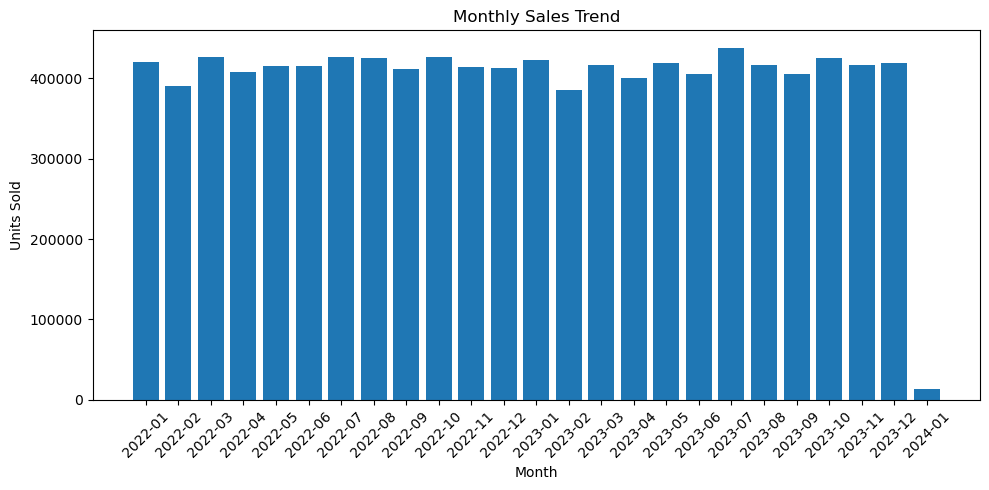

In [55]:
monthly_sales = df.groupby('Month')['Units Sold'].sum()
plt.figure(figsize=(10,5))
plt.bar(monthly_sales.index.astype(str), monthly_sales.values)
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

## Average Units Sold by Category

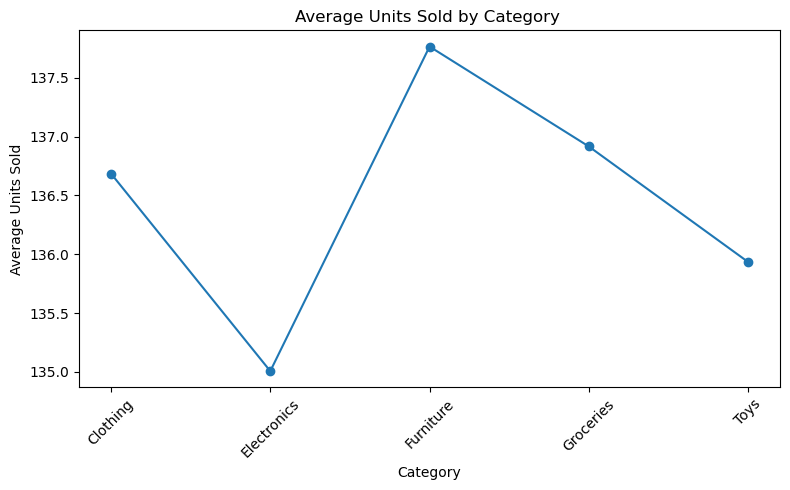

In [56]:
category_sales = df.groupby('Category')['Units Sold'].mean()
plt.figure(figsize=(8,5))
plt.plot(category_sales.index, category_sales.values, marker='o')
plt.xticks(rotation=45)
plt.title("Average Units Sold by Category ")
plt.xlabel("Category")
plt.ylabel("Average Units Sold")
plt.tight_layout()
plt.show()


## Region-wise Total Sales

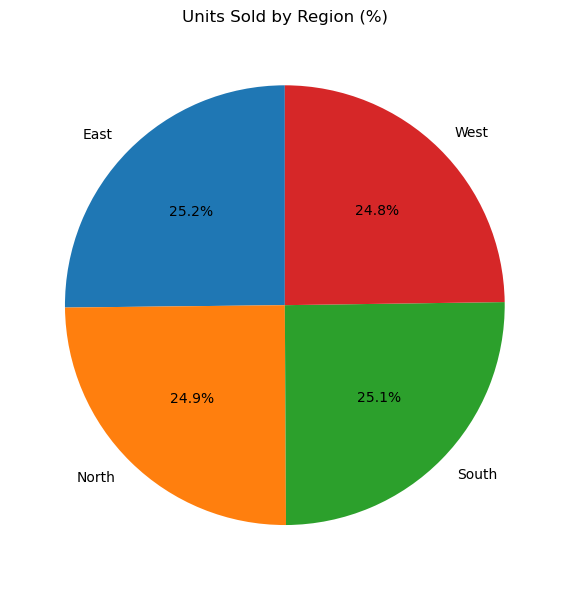

In [57]:
region_sales = df.groupby('Region')['Units Sold'].sum()

plt.figure(figsize=(8,6))
plt.pie(region_sales.values,
        labels=region_sales.index,
        autopct="%0.1f%%",      
        startangle=90)          

plt.title("Units Sold by Region (%)")
plt.tight_layout()
plt.show()


## Discount vs Units Sold

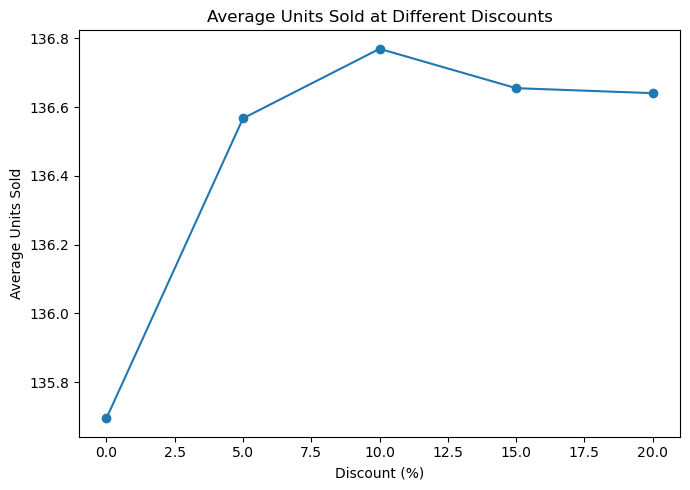

In [58]:
avg_discount = df.groupby('Discount')['Units Sold'].mean()

plt.figure(figsize=(7,5))
plt.plot(avg_discount.index, avg_discount.values, marker='o')
plt.title("Average Units Sold at Different Discounts")
plt.xlabel("Discount (%)")
plt.ylabel("Average Units Sold")
plt.tight_layout()
plt.show()



## Distribution of Units Sold

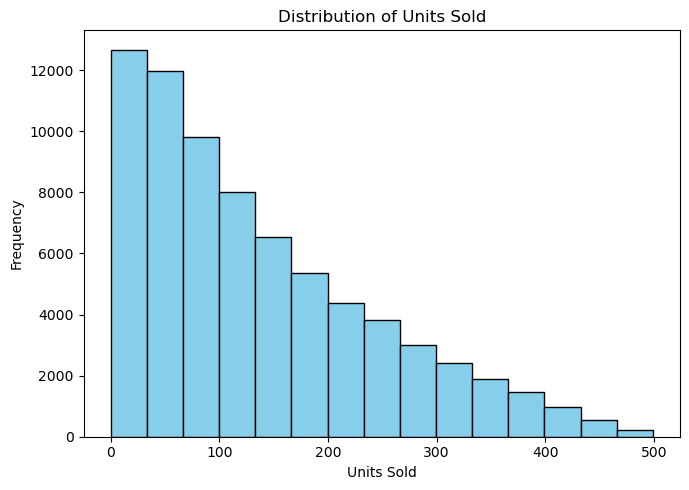

In [59]:
plt.figure(figsize=(7,5))
plt.hist(df['Units Sold'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## Units Ordered vs Units Sold 

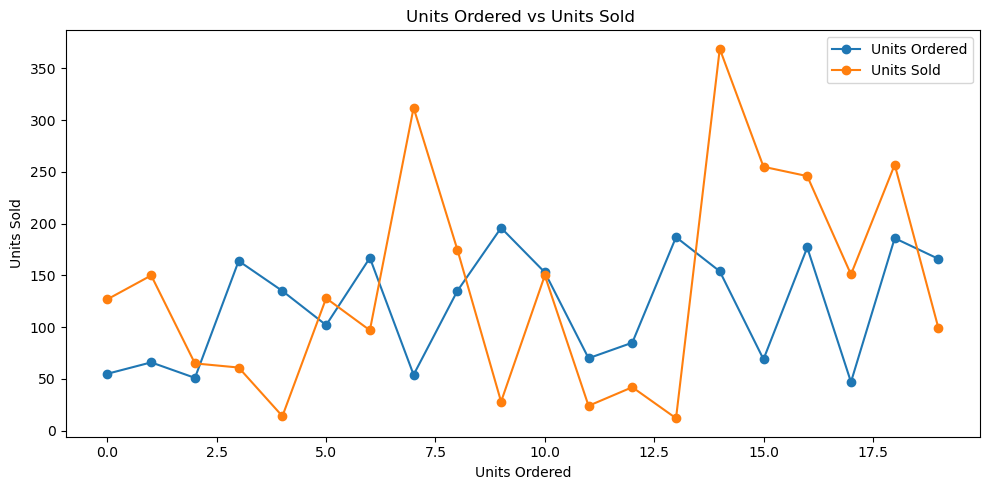

In [60]:
sample = df[['Units Ordered', 'Units Sold']].head(20)
plt.figure(figsize=(10,5))
plt.plot(sample.index, sample['Units Ordered'], marker='o', label='Units Ordered')
plt.plot(sample.index, sample['Units Sold'], marker='o', label='Units Sold')
plt.title("Units Ordered vs Units Sold ")
plt.xlabel("Units Ordered")
plt.ylabel("Units Sold")
plt.legend()
plt.tight_layout()
plt.show()


## Units Sold Distribution by Seasonality

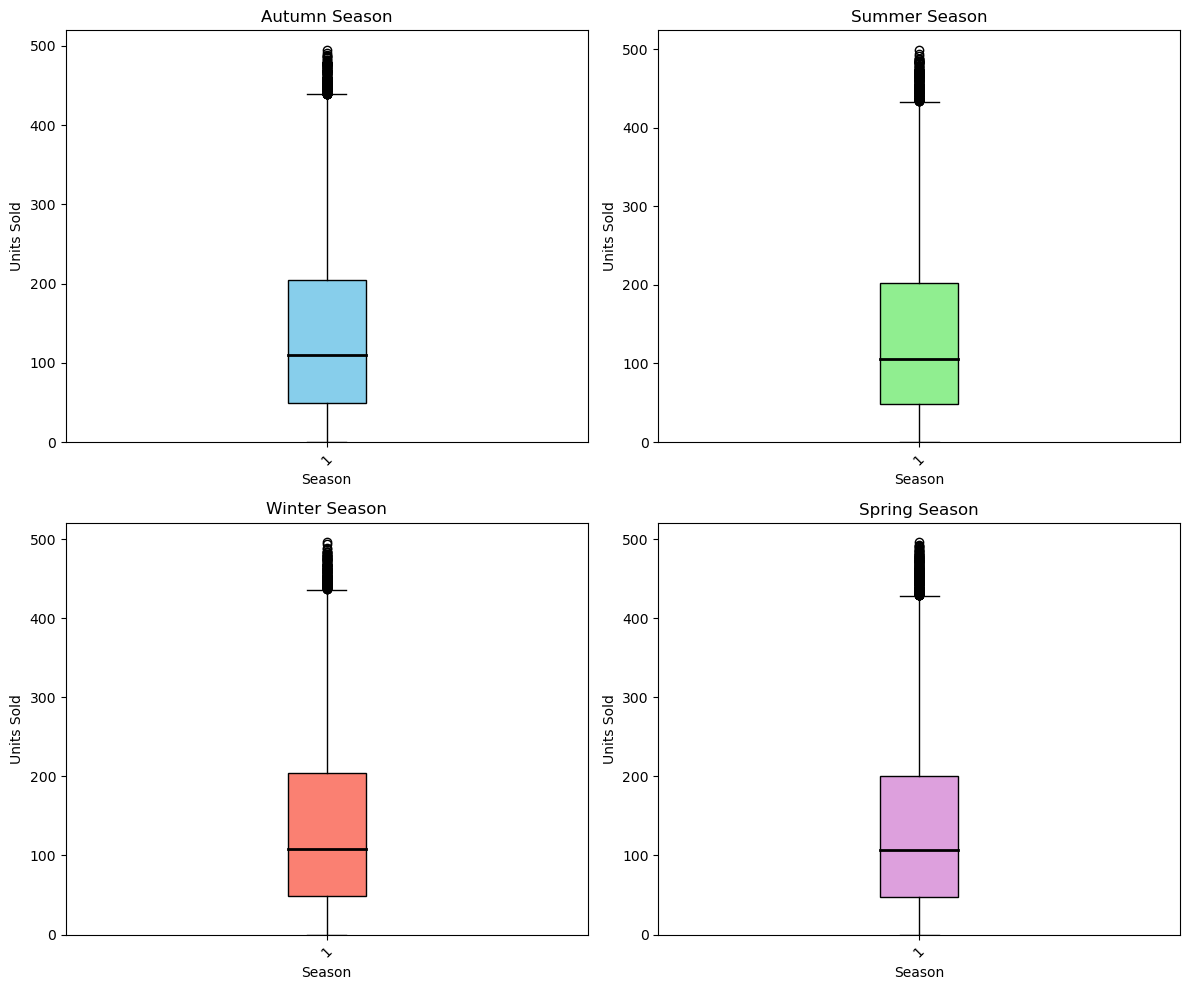

In [61]:
seasons = df['Seasonality'].unique()
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, season in enumerate(seasons):
    season_data = df[df['Seasonality'] == season]['Units Sold']
    bp = axes[i].boxplot(season_data, patch_artist=True, medianprops=dict(color='black', linewidth=2))
    for patch in bp['boxes']:
        patch.set_facecolor(colors[i])
    
    axes[i].set_title(f"{season} Season", fontsize=12)
    axes[i].set_xlabel("Season", fontsize=10)
    axes[i].set_ylabel("Units Sold", fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].set_ylim(bottom=0)

plt.tight_layout()
plt.show()


## Year-wise Total Units Sold

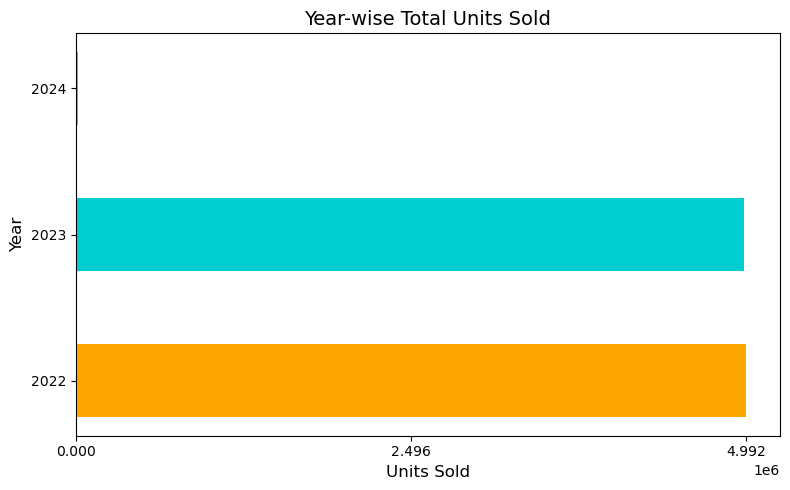

In [62]:
plt.figure(figsize=(8,5))
colors = ['#FFA500', '#00CED1', '#FF69B4', '#8A2BE2']  # Orange, DarkTurquoise, HotPink, BlueViolet
colors = colors * (len(yearly_sales) // 4 + 1)

plt.barh(yearly_sales.index.astype(str), yearly_sales.values, color=colors[:len(yearly_sales)], height=0.5)

plt.title("Year-wise Total Units Sold", fontsize=14)
plt.xlabel("Units Sold", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.yticks(fontsize=10)

max_value = yearly_sales.max()
step = max_value // 2
plt.xticks(range(0, max_value + step, step), fontsize=10)

plt.tight_layout()
plt.show()


## Distribution of Revenue

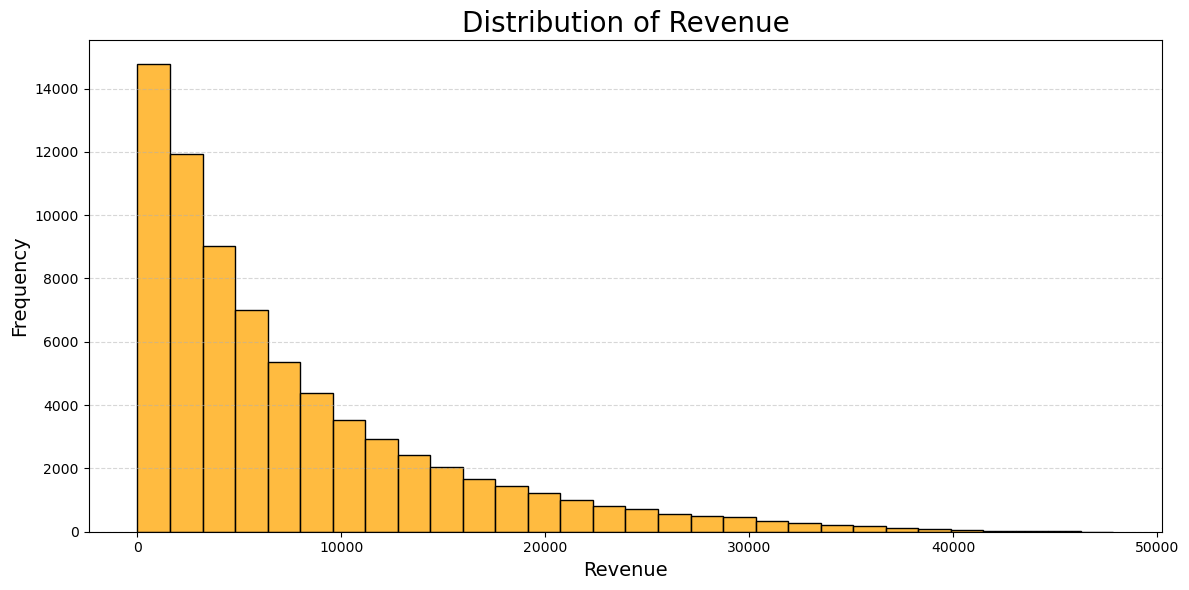

In [63]:
plt.figure(figsize=(12, 6))

sns.histplot(
    df['Revenue'],
    bins=30,
    color='orange',
    edgecolor='black'
)

plt.title("Distribution of Revenue", fontsize=20)
plt.xlabel("Revenue", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

## Revenue Share by Store 

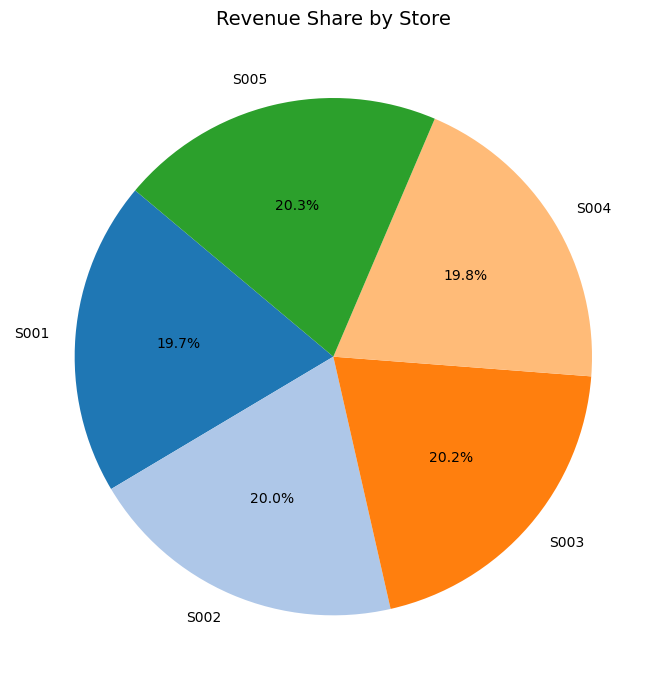

In [64]:
store_revenue = df.groupby('Store ID')['Revenue'].sum()
colors = plt.cm.tab20.colors 
plt.figure(figsize=(7,7))
store_revenue.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=colors[:len(store_revenue)]    
)
plt.title("Revenue Share by Store", fontsize=14)
plt.ylabel("") 
plt.tight_layout()
plt.show()

### Holiday / Promotion vs Units Sold 

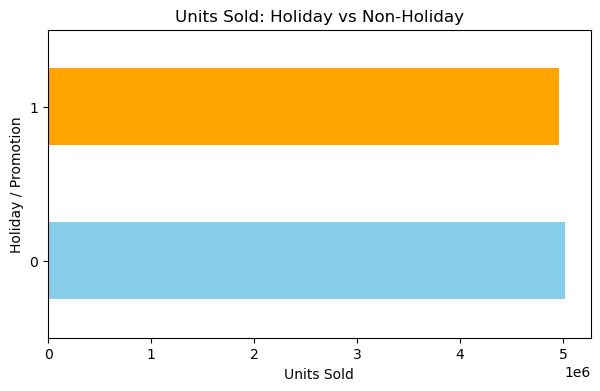

In [76]:
plt.figure(figsize=(7,4))
holiday_sales.plot(kind='barh', color=['skyblue', 'orange'])
plt.title('Units Sold: Holiday vs Non-Holiday')
plt.xlabel('Units Sold')
plt.ylabel('Holiday / Promotion')
plt.show()


## Seasonality Impact on Price

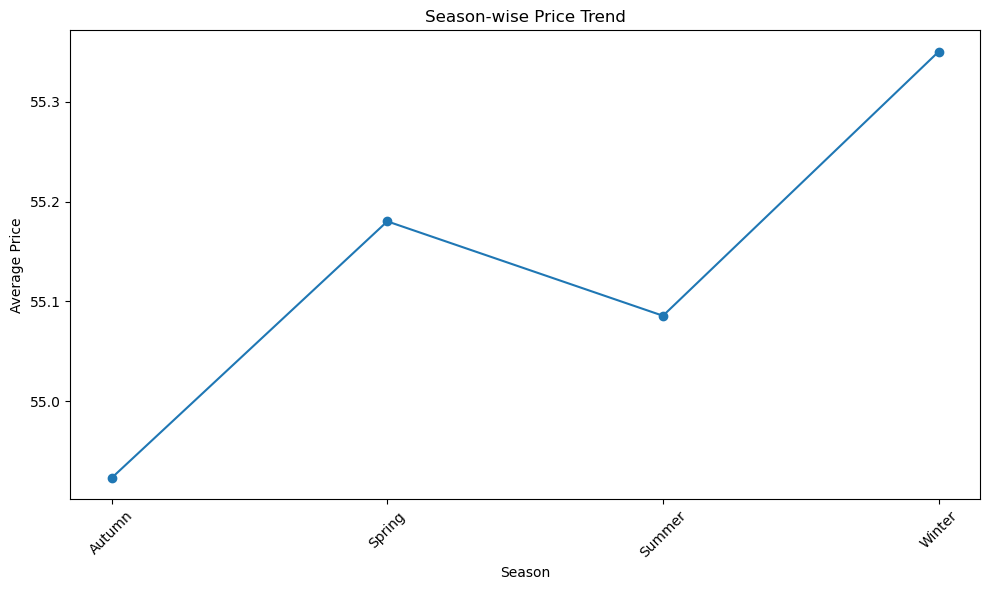

In [65]:
avg_price = df.groupby('Seasonality')['Price'].mean()

plt.figure(figsize=(10,6))
plt.plot(avg_price.index, avg_price.values, marker='o')
plt.title("Season-wise Price Trend")
plt.xlabel("Season")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Revenue Distribution by Seasonality

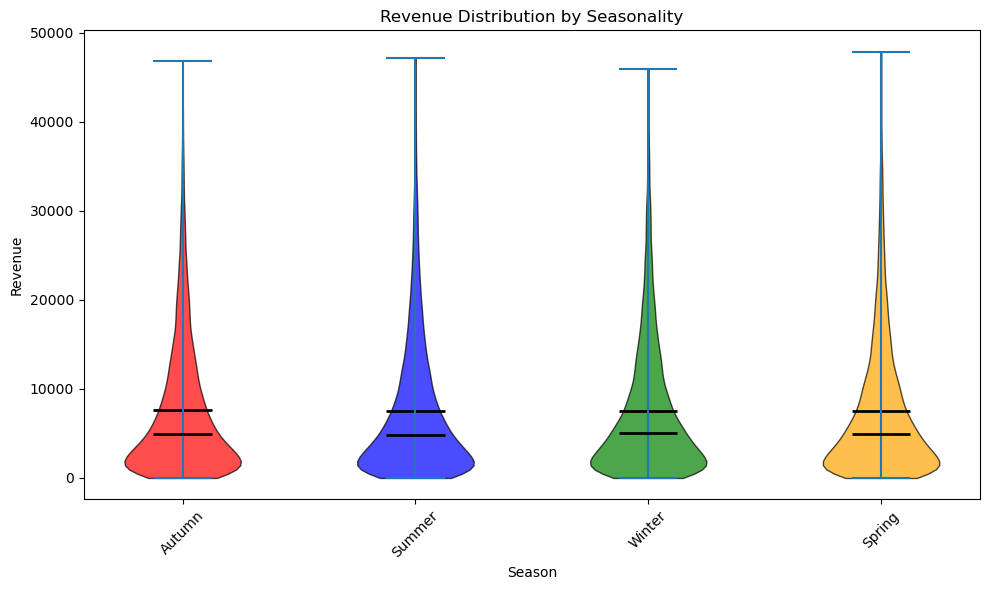

In [66]:
seasons = df['Seasonality'].unique()
data = [df[df['Seasonality'] == s]['Revenue'] for s in seasons]
plt.figure(figsize=(10,6))
parts = plt.violinplot(data, showmeans=True, showmedians=True)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
for i, body in enumerate(parts['bodies']):
    body.set_facecolor(colors[i % len(colors)])   
    body.set_edgecolor('black')                   
    body.set_alpha(0.7)                           

for key in ['cmeans', 'cmedians']:
    if key in parts:
        parts[key].set_color('black')
        parts[key].set_linewidth(2)

plt.xticks(range(1, len(seasons) + 1), seasons, rotation=45)
plt.title("Revenue Distribution by Seasonality")
plt.xlabel("Season")
plt.ylabel("Revenue")

plt.tight_layout()
plt.show()

## Product Count Across Different Weather Conditions

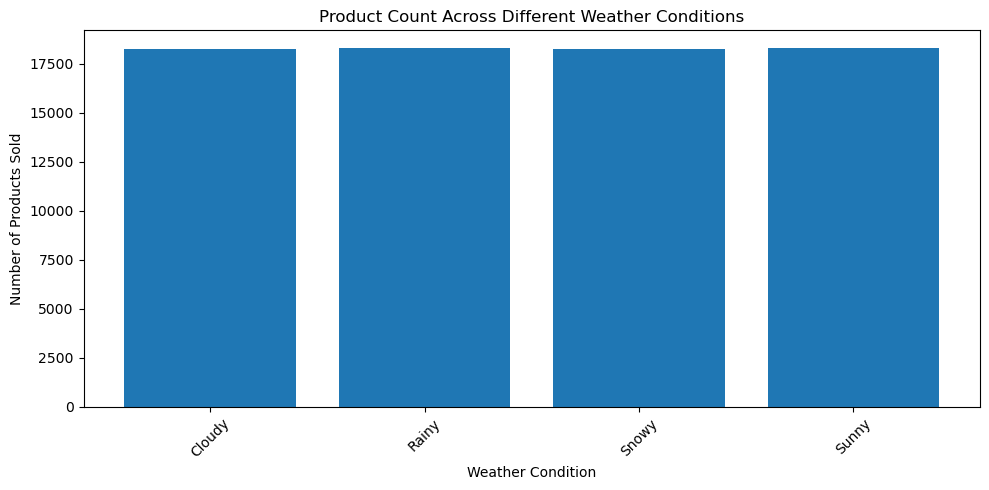

In [67]:
weather_product = df.groupby('Weather Condition')['Product ID'].count()

plt.figure(figsize=(10,5))
plt.bar(weather_product.index.astype(str), weather_product.values)
plt.title("Product Count Across Different Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Products Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Revenue Distribution by Category

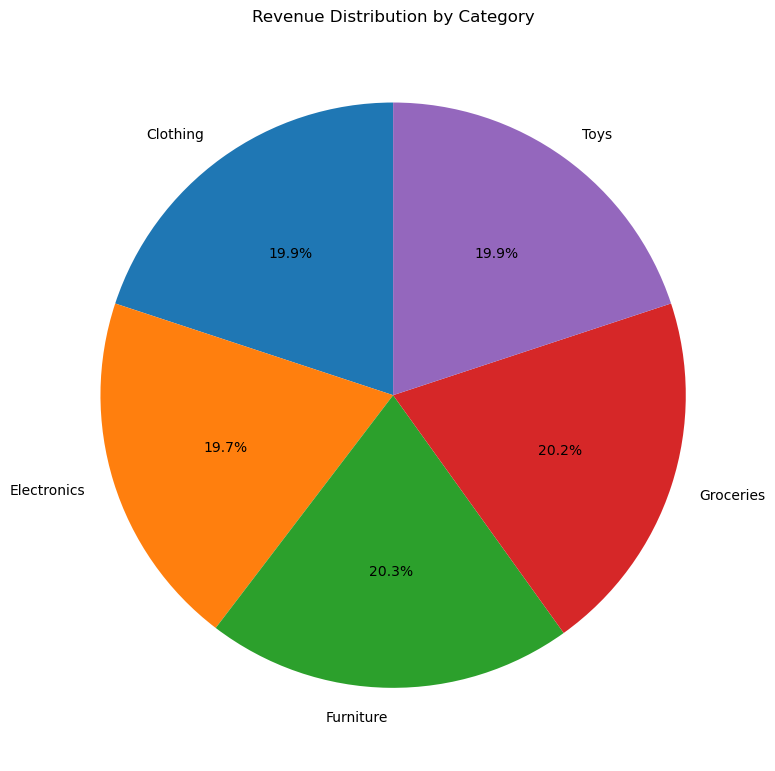

In [68]:
rev_by_category = df.groupby('Category')['Revenue'].sum()

plt.figure(figsize=(8,8))

plt.pie(
    rev_by_category,
    labels=rev_by_category.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Revenue Distribution by Category")
plt.tight_layout()
plt.show()



## Correlation Analysis of Numeric Features

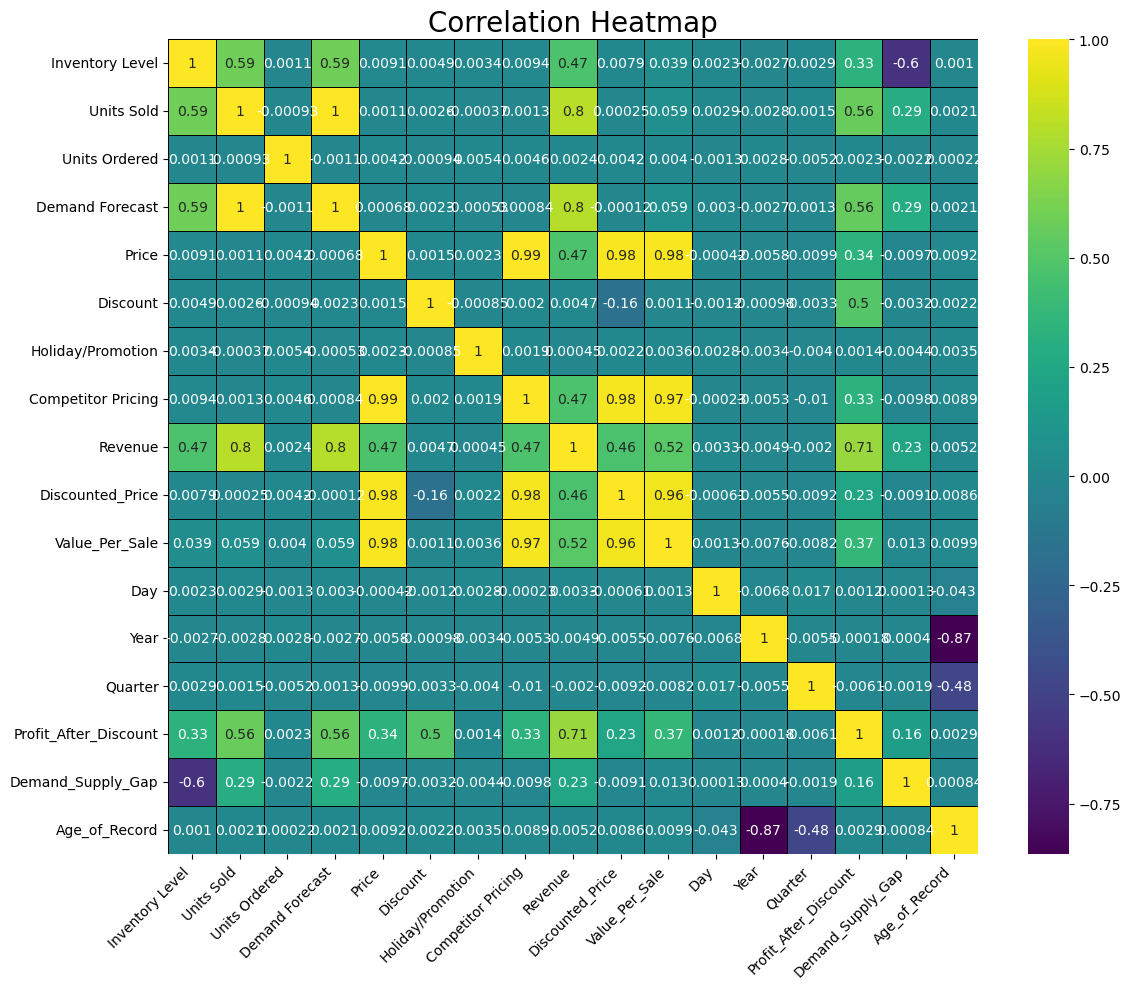

In [69]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='viridis',
    linewidths=0.5,
    linecolor='black'
)

plt.title("Correlation Heatmap", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# CONCLUSION

In this project, a detailed analysis of the retail store inventory dataset was performed to understand sales performance, pricing trends, and stock movement. A new Revenue column was created to measure the financial performance of each product. Through various visualizations, we identified how revenue is distributed across the store and how different factors such as units sold, price, and categories influence overall earnings.

The analysis shows that some products generate consistently high revenue, while others contribute very little, indicating the need for better inventory planning and demand forecasting. Understanding these patterns can help the store improve stock availability, avoid overstocking, and focus on high-performing items.

This project provides useful insights into retail operations and helps support data-driven decision-making for improving sales, profitability, and inventory efficiency.